# References
1. [complete-guide-parameter-tuning-xgboost](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
2. [visualise-categorical-variables](https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/)

In [161]:
import pandas as pd

In [162]:
test = pd.read_csv("datasets/Dataset-1/Test_bCtAN1w.csv")

In [163]:
test.columns

Index(['ID', 'Gender', 'City', 'Monthly_Income', 'DOB', 'Lead_Creation_Date',
       'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4'],
      dtype='object')

In [164]:
test.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadcf624cc0>,
      dtype=object)

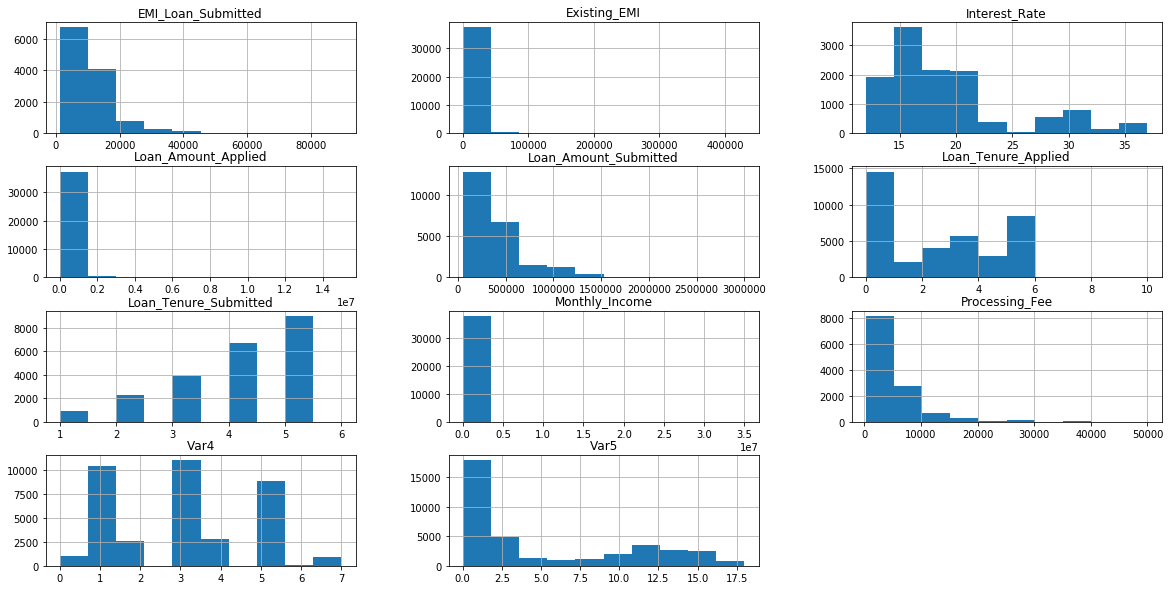

In [165]:
test.hist(figsize=(20,10))

# Visualize Categorical Variables using Univariate Analysis

col_0
count    37717
dtype: int64 

(28, 1) 

col_0   count
Source       
S122    16682 

col_0      count
Source          
S122    0.442294
S123    0.001034
S124    0.000504
S126    0.000027
S127    0.023146
S129    0.000027
S131    0.000027
S132    0.000027
S133    0.345070
S134    0.015881
S136    0.000053
S137    0.019249
S138    0.000053
S139    0.000027
S141    0.000689
S142    0.000027
S143    0.047936
S144    0.003924
S150    0.000239
S151    0.007901
S153    0.005594
S155    0.000027
S156    0.003288
S157    0.007397
S158    0.002280
S159    0.063632
S161    0.009015
S162    0.000636 



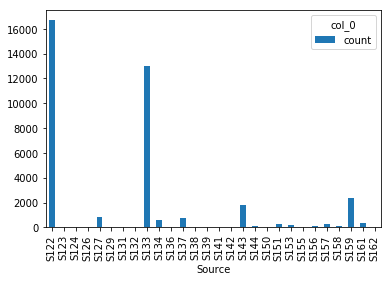

In [166]:
my_tab = pd.crosstab(index=test['Source'], columns='count')
my_tab.plot.bar()
print (my_tab.sum(), "\n") # Sum the counts
print (my_tab.shape, "\n") # Check number of rows and cols
print (my_tab.iloc[0:1], "\n") # Slice rows
print (my_tab/my_tab.sum(), "\n") # % of data for each category

# Visualize categorical variables using Bivariate Analysis
Categorical & Continuous relation

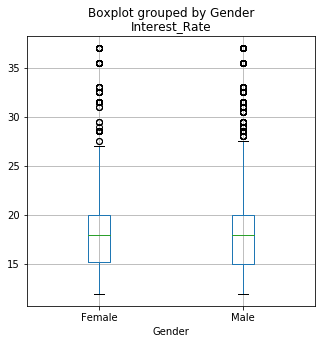

In [167]:
test.boxplot(column='Interest_Rate', 
            by='Gender',
            figsize=(5,5))

# Categorical & Categorical

Two-way table: We can start analysing the relationship by 
creating a two-way table of count and count%. The rows represent 
the category of one variable and the columns represent the 
categories of the other variable. We show count or count% of 
observations available in each combination of row and column 
categories.


In [168]:
grouped = test.groupby(['Gender', 'Device_Type'])
grouped.size()

Gender  Device_Type
Female  Mobile          3136
        Web-browser    13031
Male    Mobile          6792
        Web-browser    14758
dtype: int64

# Two-Way Tables
Two-way frequency tables, also called contingency tables, are tables of counts with two dimensions where each dimension is a different variable. Two-way tables can give you insight into the relationship between two variables.

Device_Type  Mobile  Web-browser
Gender                          
Female         3136        13031
Male           6792        14758 



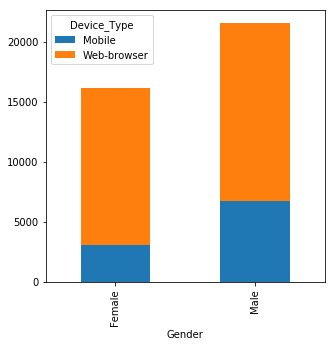

In [169]:
gender_device_table = pd.crosstab(index=test['Gender'],
                                 columns=test['Device_Type'])
print (gender_device_table, '\n')
gender_device_table.plot(kind='bar', figsize=(5,5), stacked=True)

In [170]:
test.select_dtypes(include='object').dtypes

ID                    object
Gender                object
City                  object
DOB                   object
Lead_Creation_Date    object
Employer_Name         object
Salary_Account        object
Mobile_Verified       object
Var1                  object
Filled_Form           object
Device_Type           object
Var2                  object
Source                object
dtype: object

# Data pre-processing

### 1. Convert DOB to age

In [171]:
from datetime import date, datetime

def calculate_age(born_s):
    born = datetime.strptime(born_s, '%d-%b-%y')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [172]:
test['Age'] = test['DOB'].apply(calculate_age)
print (test[['Age', 'DOB']].head(), '\n')
del test['DOB']

   Age        DOB
0   32  03-Apr-87
1   39  12-May-80
2   29  19-Sep-89
3   27  15-Aug-91
4   31  22-Jul-87 



### 2. Create new column `*_Missing` with value 1 if missing else 0

In [173]:
import numpy as np
def is_missing(val):
    return 1 if np.isnan(val) else 0

In [174]:
test['EMI_Loan_Submitted_Missing'] = test['EMI_Loan_Submitted'].apply(is_missing) 
test['Interest_Rate_Missing'] = test['Interest_Rate'].apply(is_missing) 
test['Loan_Amount_Submitted_Missing'] = test['Loan_Amount_Submitted'].apply(is_missing) 
test['Loan_Tenure_Submitted_Missing'] = test['Loan_Tenure_Submitted'].apply(is_missing) 
test['Processing_Fee_Missing'] = test['Processing_Fee'].apply(is_missing) 
print (test[['EMI_Loan_Submitted', 'EMI_Loan_Submitted_Missing']].head(), '\n')
test[['EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing', 'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing', 'Processing_Fee_Missing']].head()
test.drop(columns=['EMI_Loan_Submitted', 'Interest_Rate', 'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Processing_Fee'], inplace=True)


   EMI_Loan_Submitted  EMI_Loan_Submitted_Missing
0             2649.39                           0
1            19849.90                           0
2                 NaN                           1
3                 NaN                           1
4                 NaN                           1 



### 3. Dropped columns with too many categories or made little intuitive impact on outcome

In [175]:
test.drop(columns=['City', 'Employer_Name', 'Lead_Creation_Date', 'Salary_Account'], inplace=True)


### 4. top 2 kept as is and all others combined into different category

In [177]:
print (test.groupby(['Source']).size().sort_values(ascending=False).head(), '\n')
test['Source'] = test['Source'].apply(lambda v: v if v in ['S122', 'S133'] else 'Other')

Source
S122     16682
S133     13015
Other     8020
dtype: int64 



### 5. integer encode and onehot encode

In [195]:
print(test['Gender'].ravel(), '\n')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(test['Gender'])
print(integer_encoded, '\n')
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

['Male' 'Male' 'Female' ... 'Male' 'Female' 'Male'] 

[1 1 0 ... 1 0 1] 

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
